# UNIFIED MENTOR INTERNSHIP
# Project 1 : Analyzing Amazon Sales
# Name: Nikhil Reddy Ponnala

Problem Statement: Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits.Sales management today is the most important function in a commercial and business enterprise.

Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between attributes. 

In [20]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Define the file path of dataset

FILE_PATH = "C:/Users/nikhi/OneDrive/Desktop/Analyzing Amazon Sales data/Datasets/Amazon Sales data (2).csv"

In [24]:
#Load the data

def load_data(file_path):
    """Load and inspect the dataset."""
    data = pd.read_csv(file_path)
    print("Data Loaded Successfully!")
    print("Dataset Overview:\n", data.info())
    print("Sample Rows:\n", data.head())
    return data

Do ETL: Extract-Transform-Load some Amazon dataset and find for me

In [27]:
# define the Transform the data

def transform_data(data):
    """Perform ETL: Extract, Transform, and Load the data."""
    # Convert date columns to datetime
    data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
    data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

    # Add new columns for analysis
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Year-Month'] = data['Order Date'].dt.to_period('M')
    return data

Sales-trend -> month-wise, year-wise, yearly_month-wise

In [30]:
# Define the analyse trends of that data

def analyze_trends(data):
    """Analyze and visualize sales trends."""
    # Monthly Sales Trend
    monthly_trend = data.groupby('Order Month')['Units Sold'].sum()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="viridis")
    plt.title("Monthly Sales Trend", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Units Sold", fontsize=12)
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

    # Yearly Sales Trend
    yearly_trend = data.groupby('Order Year')['Units Sold'].sum()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b")
    plt.title("Yearly Sales Trend", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Units Sold", fontsize=12)
    plt.show()

    # Yearly-Monthly Sales Trend
    yearly_monthly_trend = data.groupby('Order Year-Month')['Units Sold'].sum()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=yearly_monthly_trend.index.to_timestamp(), y=yearly_monthly_trend.values, marker="o", color="g")
    plt.title("Yearly-Monthly Sales Trend", fontsize=16)
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Units Sold", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()



Find key metrics and factors and show the meaningful relationships between attributes. 

In [33]:
# Define the calculate metrics of that data

def calculate_metrics(data):
    """Calculate key sales metrics."""
    total_sales = data['Total Revenue'].sum()
    total_profit = data['Total Profit'].sum()
    avg_order_value = data['Total Revenue'].mean()
    avg_profit_margin = (data['Total Profit'] / data['Total Revenue']).mean() * 100

    # Top Regions and Products
    top_regions = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
    top_products_profit = data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)

    # Display Metrics
    print("--- Key Metrics ---")
    print(f"Total Sales (Revenue): ${total_sales:,.2f}")
    print(f"Total Profit: ${total_profit:,.2f}")
    print(f"Average Order Value: ${avg_order_value:,.2f}")
    print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
    print("Top 5 Regions by Revenue:\n", top_regions.head(5))
    print("Top 5 Products by Profit:\n", top_products_profit.head(5))



Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
Dataset Overview:
 None
Sample Rows:
                               Region             

C:\Users\nikhi\AppData\Local\Temp\ipykernel_9580\2356654291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="viridis")


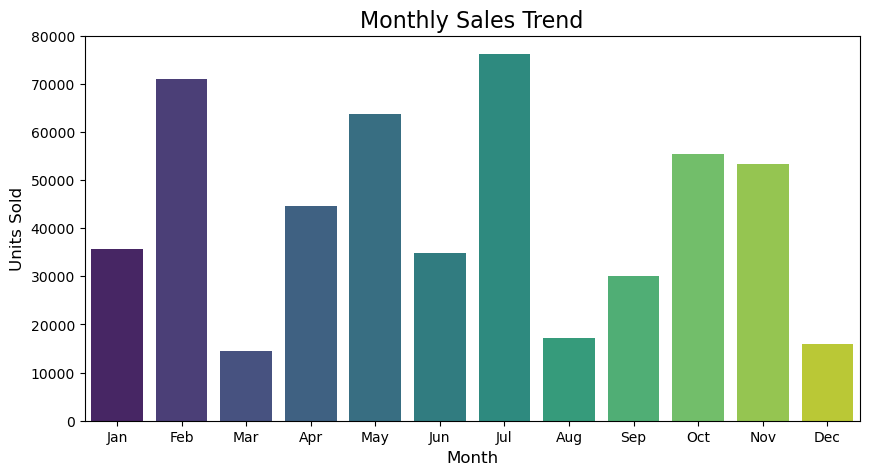

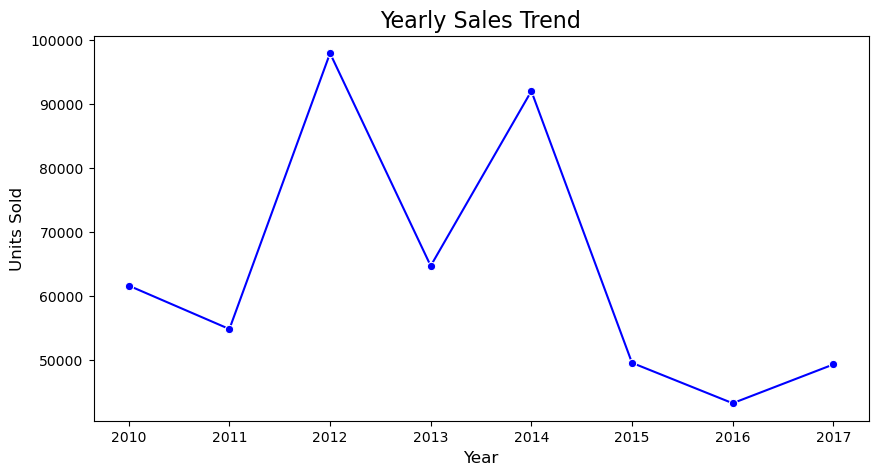

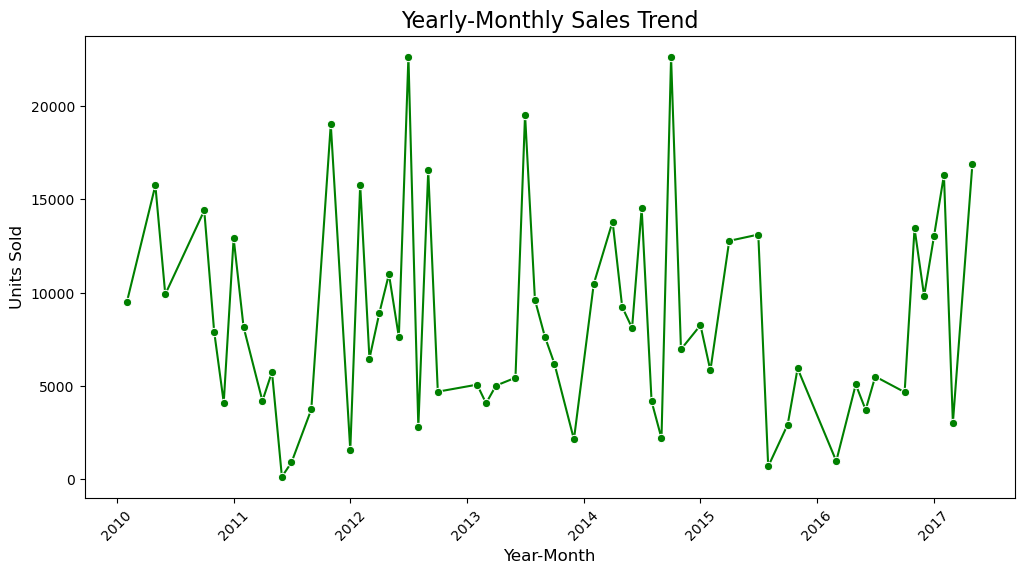

--- Key Metrics ---
Total Sales (Revenue): $137,348,768.31
Total Profit: $44,168,198.40
Average Order Value: $1,373,487.68
Average Profit Margin: 36.21%
Top 5 Regions by Revenue:
 Region
Sub-Saharan Africa              39672031.43
Europe                          33368932.11
Asia                            21347091.02
Australia and Oceania           14094265.13
Middle East and North Africa    14052706.58
Name: Total Revenue, dtype: float64
Top 5 Products by Profit:
 Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Name: Total Profit, dtype: float64


In [35]:
#     """Main function to run the project analysis."""

def main():
    # Load the data
    data = load_data(FILE_PATH)

    # Transform the data
    data = transform_data(data)

    # Analyze trends
    analyze_trends(data)

    # Calculate key metrics
    calculate_metrics(data)

if __name__ == "__main__":
    main()
